# Deep learning with keras : Introduction

Keras is a high level framework for doing deep learning and is based on tensorflow. It is very to use and allows to build standard neural networks. It allows has utilities to load standard dataset like mnist. 

The (not so good) documentation can be found at https://keras.io/


In [1]:
import keras
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.
/Users/romane/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/romane/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/romane/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/romane/anaconda3/lib/python3.7/site-packages/t

Check how you can download and Load the MNIST dataset with keras. What is the type of the variables returned by keras? 

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train//=255
x_test//=255

In [3]:
type(x_train)
x_train[0].shape

(28, 28)

Display one image or two of the MNIST dataset once it is loaded with opencv, matplotlib or skimage. 

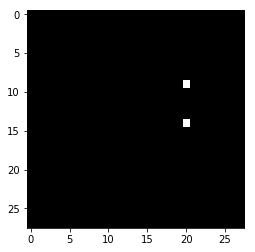

In [4]:
plt.imshow(x_train[1], cmap="gray")
plt.show()

We will now build our first Neural network ! For that we will use what is called the sequential API of Keras. Import the Sequential module, and the Dense, Convolutional and Flatten Layers as well.

In [5]:
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D

Before building the network we will try to instanciate a convolutional layer. What is the kernel size ? What is the activation function ? 

In [6]:
convLayer = Convolution2D(128, kernel_size=(3,3))

Do the same with the Dense layers.

In [7]:
denseLayer = Dense(65, activation="relu")

Now we build the model for real. Instantiate the Sequential class and put the object in the variable **model**.

<font color='red'>Remarques:</font> Convolutional Layers = automatic feature engineering.  
Dense Layers are the classification part. Flatten convert multidimensional array to flat vectors

In [8]:
from keras import backend as K
K.image_data_format()

'channels_last'

In [9]:
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [10]:
model = Sequential()
model.add(Convolution2D(128, kernel_size=3, input_shape=input_shape))
model.add(Flatten())
model.add(denseLayer)
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="SGD", 
             loss = "sparse_categorical_crossentropy")

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 174s 3ms/step - loss: 2.1785
Epoch 2/3
60000/60000 [==============================] - 155s 3ms/step - loss: 1.8707
Epoch 3/3
60000/60000 [==============================] - 154s 3ms/step - loss: 1.7208


In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
score

1.6954798530578614

Add One Convolutional layer, A Flatten layer  and two Dense layer in the model with the method `add`. Put at the last layer the activation function softmax. 

<font color='red'>Remarque</font>: Why softmax at the end ?  
The goal is to compute the class probability of the image.

Pour la compilation, on utilise SGD gradient descend. Et crossentropy utiliser pour la classification, on a pas besoin de onehotencode nos données.

In [13]:
model2 = Sequential()
model2.add(Convolution2D(64, kernel_size=3, input_shape=input_shape))
model2.add(Flatten())
model2.add(Dense(65, activation="softmax"))
model2.add(Dense(10, activation="softmax"))

Use the compile method on your model. What arguments does it require ? What is an optimiser ? What is a loss ? 

In [14]:
model.compile(optimizer="SGD", 
             loss = "sparse_categorical_crossentropy")

Train the model on the train data. You can specify the validation argument. Is the performance good ? 

In [15]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 154s 3ms/step - loss: 1.6658
Epoch 2/3
60000/60000 [==============================] - 155s 3ms/step - loss: 1.6364
Epoch 3/3
60000/60000 [==============================] - 156s 3ms/step - loss: 1.6189


In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
score

1.62747575340271

Add more convolutional layer and more Dense layers. What happens ? Does it improve the model ?

If not try to normalise your images